In [44]:
#request library.

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '5984676b-fe39-47dc-84bf-76772ef442f9',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data


{'status': {'timestamp': '2023-03-20T00:06:52.431Z', 'error_code': 0, 'error_message': None, 'elapsed': 112, 'credit_count': 1, 'notice': None, 'total_count': 9048}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10098, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [2]:
type(data)

dict

In [46]:
import pandas as pd

#To see all the columns, not just like 15

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#To normalizes the data and makes it all pretty in a dataframe

df=pd.json_normalize(data['data'])
df['Timestamp'] = pd.to_datetime('now')
df

C:\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,1,Bitcoin,BTC,bitcoin,10098,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19322287.00000,19322287.00000,NaN,1,NaN,NaN,None,2023-03-20T00:05:00.000Z,28042.29302,37766037407.08562,6.76740,-0.67756,3.82795,26.44948,14.16777,35.39740,70.40627,541841233848.41937,46.01650,588888153395.95996,None,2023-03-20T00:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-20 00:07:18.960874
1,1027,Ethereum,ETH,ethereum,6592,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,122373866.21780,122373866.21780,NaN,2,NaN,NaN,None,2023-03-20T00:05:00.000Z,1784.84285,9182322863.01665,-10.06420,-1.52869,1.13270,12.14578,5.30835,17.76403,52.78187,218418120710.25217,18.55550,218418120710.25000,None,2023-03-20T00:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-20 00:07:18.960874
2,825,Tether,USDT,tether,49669,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,76220833431.44684,79091735572.06197,NaN,3,NaN,NaN,None,2023-03-20T00:05:00.000Z,1.00308,44404492632.73720,-6.25320,0.01111,0.12350,-0.47006,0.28733,0.31016,0.30182,76455928874.43491,6.50340,79335686022.00999,None,2023-03-20T00:05:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-03-20 00:07:18.960874
3,1839,BNB,BNB,bnb,1215,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,157891124.02518,159979963.59043,NaN,4,NaN,NaN,None,2023-03-20T00:05:00.000Z,337.32657,703455375.10773,-14.36200,-0.70827,1.56879,16.11249,7.60639,17.51139,40.20473,53260871800.44514,4.52940,53965492892.88000,None,2023-03-20T00:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-20 00:07:18.960874
4,3408,USD Coin,USDC,usd-coin,11008,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,36224271634.52450,36224271634.52450,NaN,5,NaN,NaN,None,2023-03-20T00:05:00.000Z,0.99993,4042579103.85363,-16.49680,0.01211,0.09039,0.73920,-0.01127,-0.00491,-0.00555,36221725317.04160,3.08110,36221725317.04000,None,2023-03-20T00:05:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-03-20 00:07:18.960874
5,52,XRP,XRP,xrp,904,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,50950912949.00000,99989113908.00000,NaN,6,NaN,NaN,None,2023-03-20T00:05:00.000Z,0.38863,1195287273.75939,39.05130,-1.20978,3.56789,3.93671,-1.62641,2.41611,14.59017,19801012180.41759,1.68390,38862919296.93000,None,2023-03-20T00:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-20 00:07:18.960874
6,2010,Cardano,ADA,cardano,706,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,34712037915.78000,35591462141.75800,NaN,7,NaN,NaN,None,2023-03-20T00:05:00.000Z,0.34671,268481163.87362,-25.92600,-0.91652,2.40671,4.12425,-14.13363,5.85925,37.07167,12034959430.47947,1.02370,15601883579.57000,None,2023-03-20T00:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-20 00:07:18.960874
7,3890,Polygon,MATIC,polygon,616,2019-04-28T00:00:00.000Z,"[platform, enterprise-solutions, zero-knowledg...",10000000000.00000,8734317475.28493,10000000000.00000,NaN,8,NaN,NaN,None,2023-03-20T00:05:00.000Z,1.17306,434788198.63161,-18.55760,-0.44087,-0.21582,1.35571,-23.34241,24.67815,51.74302,10245905871.53116,0.87040,11730631386.51000,None,2023-03-20T00:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-20 00:07:18.960874
8,7

In [47]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'10',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '5984676b-fe39-47dc-84bf-76772ef442f9',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

#To keep it in a dataframe
    df = pd.json_normalize(data['data'])
    df['Timestamp'] = pd.to_datetime('now')
    df 
    
    if not os.path.isfile(r'C:\Users\sovuehor\API.csv'):
        df.to_csv(r'C:\Users\sovuehor\API.csv', header='column_names')
    else:
        df.to_csv(r'C:\Users\sovuehor\API.csv', mode='a', header=False)
        

In [ ]:
import os
from time import time
from time import sleep

for i in range (333):
    api_runner()
    print('API Runner completed successfuly')
    sleep(60) #sleep for 1 minute
exit()

{'status': {'timestamp': '2023-03-20T00:07:52.752Z', 'error_code': 0, 'error_message': None, 'elapsed': 18, 'credit_count': 1, 'notice': None, 'total_count': 9048}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10098, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

C:\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


{'status': {'timestamp': '2023-03-20T00:08:53.232Z', 'error_code': 0, 'error_message': None, 'elapsed': 28, 'credit_count': 1, 'notice': None, 'total_count': 9048}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10098, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

C:\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


{'status': {'timestamp': '2023-03-20T00:09:53.903Z', 'error_code': 0, 'error_message': None, 'elapsed': 28, 'credit_count': 1, 'notice': None, 'total_count': 9048}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10098, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

C:\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


{'status': {'timestamp': '2023-03-20T00:10:54.626Z', 'error_code': 0, 'error_message': None, 'elapsed': 25, 'credit_count': 1, 'notice': None, 'total_count': 9048}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10098, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

C:\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


{'status': {'timestamp': '2023-03-20T00:11:55.141Z', 'error_code': 0, 'error_message': None, 'elapsed': 24, 'credit_count': 1, 'notice': None, 'total_count': 9048}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10098, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

C:\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


{'status': {'timestamp': '2023-03-20T00:12:55.784Z', 'error_code': 0, 'error_message': None, 'elapsed': 37, 'credit_count': 1, 'notice': None, 'total_count': 9048}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10098, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

C:\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


{'status': {'timestamp': '2023-03-20T00:13:56.385Z', 'error_code': 0, 'error_message': None, 'elapsed': 26, 'credit_count': 1, 'notice': None, 'total_count': 9048}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10098, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

C:\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


{'status': {'timestamp': '2023-03-20T00:14:56.963Z', 'error_code': 0, 'error_message': None, 'elapsed': 28, 'credit_count': 1, 'notice': None, 'total_count': 9048}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10098, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

C:\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


{'status': {'timestamp': '2023-03-20T00:15:57.835Z', 'error_code': 0, 'error_message': None, 'elapsed': 111, 'credit_count': 1, 'notice': None, 'total_count': 9048}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10098, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

C:\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


{'status': {'timestamp': '2023-03-20T00:16:58.570Z', 'error_code': 0, 'error_message': None, 'elapsed': 31, 'credit_count': 1, 'notice': None, 'total_count': 9048}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10098, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

C:\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


{'status': {'timestamp': '2023-03-20T00:17:59.397Z', 'error_code': 0, 'error_message': None, 'elapsed': 37, 'credit_count': 1, 'notice': None, 'total_count': 9048}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10098, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

C:\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


{'status': {'timestamp': '2023-03-20T00:19:00.396Z', 'error_code': 0, 'error_message': None, 'elapsed': 181, 'credit_count': 1, 'notice': None, 'total_count': 9048}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10098, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

C:\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


{'status': {'timestamp': '2023-03-20T00:20:00.821Z', 'error_code': 0, 'error_message': None, 'elapsed': 19, 'credit_count': 1, 'notice': None, 'total_count': 9048}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10098, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

C:\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


{'status': {'timestamp': '2023-03-20T00:21:01.353Z', 'error_code': 0, 'error_message': None, 'elapsed': 29, 'credit_count': 1, 'notice': None, 'total_count': 9048}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10098, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

C:\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


{'status': {'timestamp': '2023-03-20T00:22:01.819Z', 'error_code': 0, 'error_message': None, 'elapsed': 28, 'credit_count': 1, 'notice': None, 'total_count': 9048}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10098, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

C:\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


{'status': {'timestamp': '2023-03-20T00:23:02.604Z', 'error_code': 0, 'error_message': None, 'elapsed': 30, 'credit_count': 1, 'notice': None, 'total_count': 9048}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10098, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

C:\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


{'status': {'timestamp': '2023-03-20T00:24:03.382Z', 'error_code': 0, 'error_message': None, 'elapsed': 109, 'credit_count': 1, 'notice': None, 'total_count': 9048}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10098, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

C:\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


{'status': {'timestamp': '2023-03-20T00:25:04.036Z', 'error_code': 0, 'error_message': None, 'elapsed': 24, 'credit_count': 1, 'notice': None, 'total_count': 9048}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10098, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

C:\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


In [ ]:
#Then to read in the file

df1 = pd.read_csv(r'C:\Users\sovuehor\API.csv')
df1

In [11]:
# One thing I noticed was the scientific notation. I like it, but I want to be able to see the numbers in this case

pd.set_option('display.float_format', lambda x: '%.5f' % x)
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,1,Bitcoin,BTC,bitcoin,10098,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19322212.00000,19322212.00000,NaN,1,None,None,None,2023-03-19T22:10:00.000Z,28114.58754,37794597111.19676,-1.71620,-0.43459,3.00882,31.65650,15.95102,35.51059,69.25546,543236020657.32092,46.03540,590406338249.67004,None,2023-03-19T22:10:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-19 22:12:18.096351
1,1027,Ethereum,ETH,ethereum,6591,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,122373866.21780,122373866.21780,NaN,2,None,None,None,2023-03-19T22:10:00.000Z,1803.67876,9144008974.02414,-16.93890,-0.69573,1.10001,16.53125,7.36552,18.26278,53.37643,220723143038.05927,18.71210,220723143038.06000,None,2023-03-19T22:10:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-19 22:12:18.096351
2,825,Tether,USDT,tether,49667,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,76220833431.44684,79091735572.06197,NaN,3,None,None,None,2023-03-19T22:10:00.000Z,1.00298,44475345920.36139,-12.58070,-0.00932,0.05146,-0.69172,0.28018,0.29266,0.29088,76447740308.02211,6.48540,79327189028.47000,None,2023-03-19T22:10:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-03-19 22:12:18.096351
3,1839,BNB,BNB,bnb,1215,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,157891135.58563,159979963.59043,NaN,4,None,None,None,2023-03-19T22:10:00.000Z,338.32530,713238133.14394,-18.42080,-0.48966,0.51970,19.64719,8.87307,17.13257,39.29201,53418565861.21003,4.52860,54125269223.20000,None,2023-03-19T22:10:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-19 22:12:18.096351
4,3408,USD Coin,USDC,usd-coin,11006,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,36224271644.52455,36224271644.52455,NaN,5,None,None,None,2023-03-19T22:10:00.000Z,0.99982,4031135809.52427,-21.87590,-0.02303,0.04864,3.34194,0.01972,0.01319,-0.01127,36217703522.23319,3.07250,36217703522.23000,None,2023-03-19T22:10:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-03-19 22:12:18.096351
5,52,XRP,XRP,xrp,904,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,50950912949.00000,99989113908.00000,NaN,6,None,None,None,2023-03-19T22:10:00.000Z,0.39306,1177176078.53623,28.28150,0.36185,3.78603,7.99103,0.28003,2.58251,15.30589,20026799714.56994,1.69780,39306066477.39000,None,2023-03-19T22:10:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-19 22:12:18.096351
6,2010,Cardano,ADA,cardano,706,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,34711624460.75600,35591462141.75800,NaN,7,None,None,None,2023-03-19T22:10:00.000Z,0.34818,274785132.68922,-29.13860,-0.02563,1.31783,8.53658,-12.89347,6.23642,36.23513,12085846169.34245,1.02530,15668038764.23000,None,2023-03-19T22:10:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-19 22:12:18.096351
7,3890,Polygon,MATIC,polygon,615,2019-04-28T00:00:00.000Z,"[platform, enterprise-solutions, zero-knowledg...",10000000000.00000,8734317475.28493,10000000000.00000,NaN,8,None,None,None,2023-03-19T22:10:00.000Z,1.18224,411235505.80677,-27.56360,-0.89134,-0.88229,5.93792,-20.71563,24.86339,51.33907,10326049095.21931,0.87540,11822388096.65000,None,2023-03-19T22:10:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-19 22:

In [12]:
# Now let's look at the coin trends over time

df2 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df2

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.43459,3.00882,31.65650,15.95102,35.51059,69.25546
Ethereum,-0.69573,1.10001,16.53125,7.36552,18.26278,53.37643
Tether,-0.00932,0.05146,-0.69172,0.28018,0.29266,0.29088
BNB,-0.48966,0.51970,19.64719,8.87307,17.13257,39.29201
USD Coin,-0.02303,0.04864,3.34194,0.01972,0.01319,-0.01127
XRP,0.36185,3.78603,7.99103,0.28003,2.58251,15.30589
Cardano,-0.02563,1.31783,8.53658,-12.89347,6.23642,36.23513
Polygon,-0.89134,-0.88229,5.93792,-20.71563,24.86339,51.33907
Dogecoin,-0.83474,0.75146,8.10280,-13.47372,-6.86421,3.88767


In [13]:
df3 = df2.stack()
df3

name                                  
Bitcoin   quote.USD.percent_change_1h     -0.43459
          quote.USD.percent_change_24h     3.00882
          quote.USD.percent_change_7d     31.65650
          quote.USD.percent_change_30d    15.95102
          quote.USD.percent_change_60d    35.51059
          quote.USD.percent_change_90d    69.25546
Ethereum  quote.USD.percent_change_1h     -0.69573
          quote.USD.percent_change_24h     1.10001
          quote.USD.percent_change_7d     16.53125
          quote.USD.percent_change_30d     7.36552
          quote.USD.percent_change_60d    18.26278
          quote.USD.percent_change_90d    53.37643
Tether    quote.USD.percent_change_1h     -0.00932
          quote.USD.percent_change_24h     0.05146
          quote.USD.percent_change_7d     -0.69172
          quote.USD.percent_change_30d     0.28018
          quote.USD.percent_change_60d     0.29266
          quote.USD.percent_change_90d     0.29088
BNB       quote.USD.percent_change_1h     -

In [14]:
type (df3)

pandas.core.series.Series

In [15]:
df4 = df3.to_frame(name='values')
df4

values
name                                           
Bitcoin  quote.USD.percent_change_1h   -0.43459
         quote.USD.percent_change_24h   3.00882
         quote.USD.percent_change_7d   31.65650
         quote.USD.percent_change_30d  15.95102
         quote.USD.percent_change_60d  35.51059
         quote.USD.percent_change_90d  69.25546
Ethereum quote.USD.percent_change_1h   -0.69573
         quote.USD.percent_change_24h   1.10001
         quote.USD.percent_change_7d   16.53125
         quote.USD.percent_change_30d   7.36552
         quote.USD.percent_change_60d  18.26278
         quote.USD.percent_change_90d  53.37643
Tether   quote.USD.percent_change_1h   -0.00932
         quote.USD.percent_change_24h   0.05146
         quote.USD.percent_change_7d   -0.69172
         quote.USD.percent_change_30d   0.28018
         quote.USD.percent_change_60d   0.29266
         quote.USD.percent_change_90d   0.29088
BNB      quote.USD.percent_change_1h   -0.48966
         quote.USD.percent_change_24h   0.51970
         quote.USD.percent_change_7d   19.64719
         quote.USD.percent_change_30d   8.87307
         quote.USD.percent_change_60d  17.13257
         quote.USD.percent_change_90d  39.29201
USD Coin quote.USD.percent_change_1h   -0.02303
         quote.USD.percent_change_24h   0.04864
         quote.USD.percent_change_7d    3.34194
         quote.USD.percent_change_30d   0.01972
         quote.USD.percent_change_60d   0.01319
         quote.USD.percent_change_90d  -0.01127
XRP      quote.USD.percent_change_1h    0.36185
         quote.USD.percent_change_24h   3.78603
         quote.USD.percent_change_7d    7.99103
         quote.USD.percent_change_30d   0.28003
         quote.USD.percent_change_60d   2.58251
         quote.USD.percent_change_90d  15.30589
Cardano  quote.USD.percent_change_1h   -0.02563
         quote.USD.percent_change_24h   1.31783
         quote.USD.percent_change_7d    8.53658
         quote.USD.percent_change_30d -12.89347
         quote.USD.percent_change_60d   6.23642
         quote.USD.percent_change_90d  36.23513
Polygon  quote.USD.percent_change_1h   -0.89134
         quote.USD.percent_change_24h  -0.88229
         quote.USD.percent_change_7d    5.93792
         quote.USD.percent_change_30d -20.71563
         quote.USD.percent_change_60d  24.86339
         quote.USD.percent_change_90d  51.33907
Dogecoin quote.USD.percent_change_1h   -0.83474
         quote.USD.percent_change_24h   0.75146
         quote.USD.percent_change_7d    8.10280
         quote.USD.percent_change_30d -13.47372
         quote.USD.percent_change_60d  -6.86421
         quote.USD.percent_change_90d   3.88767
Solana   quote.USD.percent_change_1h   -0.80048
         quote.USD.percent_change_24h   0.96034
         quote.USD.percent_change_7d   14.65365
         quote.USD.percent_change_30d  -3.88649
         quote.USD.percent_change_60d   3.72740
         quote.USD.percent_change_90d  82.63127

In [16]:
df4.count()

values    60
dtype: int64

In [18]:
#Because of how it's structured above an index is needed. I don't want to pass a column as an index for this dataframe
#----So I'm going to create a range and pass that as the dataframe and make this more dynamic.


index = pd.Index(range(60))

#--- Set the above DataFrame index object as the index
#---- using set_index() function
df5 = df4.reset_index()
df5

#----If it only has the index and values try doing reset_index like "df4.reset_index()"

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.43459
1,Bitcoin,quote.USD.percent_change_24h,3.00882
2,Bitcoin,quote.USD.percent_change_7d,31.65650
3,Bitcoin,quote.USD.percent_change_30d,15.95102
4,Bitcoin,quote.USD.percent_change_60d,35.51059
5,Bitcoin,quote.USD.percent_change_90d,69.25546
6,Ethereum,quote.USD.percent_change_1h,-0.69573
7,Ethereum,quote.USD.percent_change_24h,1.10001
8,Ethereum,quote.USD.percent_change_7d,16.53125
9,Ethereum,quote.USD.percent_change_30d,7.36552


In [19]:
#---- Change the column name

df6 = df5.rename(columns={'level_1': 'percent_change'})
df6

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.43459
1,Bitcoin,quote.USD.percent_change_24h,3.00882
2,Bitcoin,quote.USD.percent_change_7d,31.65650
3,Bitcoin,quote.USD.percent_change_30d,15.95102
4,Bitcoin,quote.USD.percent_change_60d,35.51059
5,Bitcoin,quote.USD.percent_change_90d,69.25546
6,Ethereum,quote.USD.percent_change_1h,-0.69573
7,Ethereum,quote.USD.percent_change_24h,1.10001
8,Ethereum,quote.USD.percent_change_7d,16.53125
9,Ethereum,quote.USD.percent_change_30d,7.36552


In [24]:
df6['percent_change'] = df6['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1','24h','7d','30d','60d','90d'])
df6

,name,percent_change,values
0,Bitcoin,1,-0.43459
1,Bitcoin,24h,3.00882
2,Bitcoin,7d,31.65650
3,Bitcoin,30d,15.95102
4,Bitcoin,60d,35.51059
5,Bitcoin,90d,69.25546
6,Ethereum,1,-0.69573
7,Ethereum,24h,1.10001
8,Ethereum,7d,16.53125
9,Ethereum,30d,7.36552


In [20]:
import seaborn as sns

import matplotlib.pyplot as plt

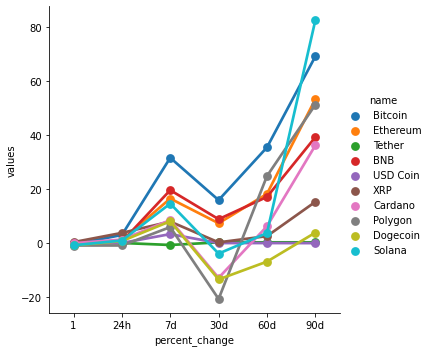

In [25]:
sns.catplot(x='percent_change', y='values', hue='name', data=df6, kind='point')

In [ ]:
# ---Now to do something much simpler
#--- we are going to create a dataframe with the columns we want

df7 = df[['name','quote.USD.price','Timestamp']]
df7 = df7.query("name == ['Solana','Bitcoin','Tether']")
df7

In [ ]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='Timestamp', y='quote.USD.price', data = df7)